<h1> Momento de Retroalimentación: Reto Limpieza del Conjunto de Datos
<h1/>




```
# Equipo 4
Abraham Gil Félix | A01750884
Carlos de Jésus Ávila González | A01750220
Enrique Maldonado Chavarría | A01652370
Juan Daniel Aranda Morales  | A01379571
Eduardo Acosta Hernández | A01375206
```



# Spaceship Titanic

In [ ]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importación de librerías

In [ ]:
import re
import os
import pydot 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns
from scipy.linalg import sqrtm

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Conexión con Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Carga de los datos

Dado que se tienen los datos divididos en dos grandes conjuntos (entrenamiento y prueba), no es necesario utilizar la función train_test_split de sklearn para la partición del dataset.

In [ ]:
# Carga del conjunto de entrenamiento
train_set = pd.read_csv('/content/drive/Shareddrives/TeamAI-4/Reto/train.csv')

In [ ]:
# Carga del conjunto de prueba
test_set = pd.read_csv('/content/drive/Shareddrives/TeamAI-4/Reto/test.csv')

## Análisis exploratorio de los datos

Realizamos una exploración del conjunto de datos, con la finalidad de conocer su estructura y sus principales características.

Detectamos datos faltantes en distintas variables del dataset, por lo que realizamos el tratamiento en cada una de estas para posteriormente obtener un resultado óptimo al introducir los datos a nuestro modelo de entrenamiento. Este proceso se debe hacer por separado entre los datos train y test ya que, de esta forma no se afectará uno al otro al momento de hacer la limpieza y preprocesado de los datos.

In [ ]:
# Visualización de las variables y su tipo del conjunto de datos de entrenamiento
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
# Visualización de las variables y su tipo del conjunto de datos de prueba
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


En esta sección obtenemos la suma de los datos faltantes para cada variable, esto para conocer cuáles son las variables que necesatimos rellenar más adelante.

In [ ]:
# Visualización de datos faltantes en cada variable del conjunto de entrenamiento
train_set.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
# Visualización del porcentaje de datos faltantes en cada variable del conjunto de entrenamiento
train_set.isna().sum()/train_set.shape[0]

PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
Transported     0.000000
dtype: float64

In [ ]:
# Visualización de datos faltantes en cada variable del conjunto de prueba
test_set.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [ ]:
# Visualización del porcentaje de datos faltantes en cada variable del conjunto de prueba
test_set.isna().sum()/test_set.shape[0]

PassengerId     0.000000
HomePlanet      0.020341
CryoSleep       0.021744
Cabin           0.023381
Destination     0.021510
Age             0.021277
VIP             0.021744
RoomService     0.019172
FoodCourt       0.024784
ShoppingMall    0.022913
Spa             0.023615
VRDeck          0.018705
Name            0.021978
dtype: float64

Continuando con la exploración de datos, revisamos que no existan datos duplicados y conocemos la cantidad de datos que existen para cada categoría.

In [ ]:
# Comprobación de la no existencia de información duplicada de pasajeros en el conjunto entrenamiento
train_set['PassengerId'].duplicated().sum()

0

In [ ]:
# Comprobación de la no existencia de información duplicada de pasajeros en el conjunto prueba
test_set['PassengerId'].duplicated().sum()

0

In [ ]:
# Cantidad de cabinas en el Titanic en el conjunto entrenamiento
train_set['Cabin'].nunique()

6560

In [ ]:
# Cantidad de cabinas en el Titanic en el conjunto prueba
test_set['Cabin'].nunique()

3265

In [ ]:
# Diferentes clases para la variable 'HomePlanet' en el  conjunto entrenamiento
train_set['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [ ]:
# Diferentes clases para la variable 'HomePlanet' en el  conjunto prueba
test_set['HomePlanet'].value_counts()

Earth     2263
Europa    1002
Mars       925
Name: HomePlanet, dtype: int64

In [ ]:
# Diferentes clases para la variable 'HomePlanet' en el conjunto entrenamiento
train_set['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [ ]:
# Diferentes clases para la variable 'HomePlanet' en el conjunto prueba
test_set['Destination'].value_counts()

TRAPPIST-1e      2956
55 Cancri e       841
PSO J318.5-22     388
Name: Destination, dtype: int64

Para nuestra variable 'Age' realizamos un exploración más profunda debido a que es una de las variables que más información nos va a aportar para poder encontrar el valor de nuestra variable predictiva.

In [ ]:
# Rango de edades para la edad de los pasajeros en el conjunto entrenamiento
train_set['Age'].value_counts()

24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 80, dtype: int64

In [ ]:
# Rango de edades para la edad de los pasajeros en el conjunto prueba
test_set['Age'].value_counts()

18.0    176
22.0    163
19.0    162
20.0    160
24.0    158
       ... 
70.0      2
79.0      2
68.0      2
78.0      1
77.0      1
Name: Age, Length: 79, dtype: int64

In [ ]:
# Total de edades únicas entre los pasajeros en el conjunto entrenamiento
train_set['Age'].nunique()

80

In [ ]:
# Total de edades únicas entre los pasajeros en el conjunto prueba
test_set['Age'].nunique()

79

Obtenemos un histograma de nuestra variable 'Age'. Podemos observar que parece asimilarse a una distribución normal, sin embargo observamos que la gráfica está sesgada hacia el lado izquierdo.

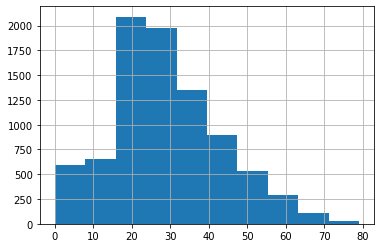

In [ ]:
# Histograma de edades en el conjunto entrenamiento
train_set['Age'].hist()

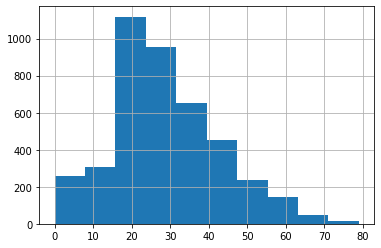

In [ ]:
# Histograma de edades en el conjunto prueba
test_set['Age'].hist()

### Variables Numéricas

   
*   Age
*   RoomService
*   FoodCourt
*   Elemento de lista
*   ShoppingMall
*   Spa
*   VRDeck





### Variables Categóricas



*   PassengerId
*   HomePlanet
*   CryoSleep
*   Cabin
*   Destination
*   VIP
*   Name
*   Transported *(target)*











## Tratamiento de los datos faltantes

Primero dividimos la variable cabine en tres diferentes clases en ambos conjuntos de datos, esto con el objetivo de obtener información más precisa y encontrar diferentes relaciones con las otras variables.

### Conjunto de entrenamiento

In [ ]:
# Estadística descriptiva de la variable 'Cabin' en el conjunto de entrenamiento
train_set.Cabin.describe()

count        8494
unique       6560
top       G/734/S
freq            8
Name: Cabin, dtype: object

In [ ]:
# Reemplazo de valores faltantes por la cabina con mayor frecuencia en el conjunto entrenamiento
train_set.Cabin.fillna('G/734/S', inplace=True)
train_set.Cabin.isnull().sum()

0

In [ ]:
# División de la variable 'Cabin' en tres variables hijas para el conjunto de entrenamiento
cabin_deck = []
cabin_num = []
cabin_side = []


for i in train_set.Cabin:
    cabin = re.split('/', i)
    cabin_deck.append(cabin[0])
    cabin_num.append(cabin[1])
    cabin_side.append(cabin[2])

train_set['Cabin_deck'] = cabin_deck
train_set['Cabin_num'] = cabin_num
train_set['Cabin_side'] = cabin_side

### Conjunto de prueba

In [ ]:
# Estadística descriptiva de la variable 'Cabin' en el conjunto de prueba
test_set.Cabin.describe()

count        4177
unique       3265
top       G/160/P
freq            8
Name: Cabin, dtype: object

In [ ]:
# Reemplazo de valores faltantes por la cabina con mayor frecuencia en el conjunto prueba
test_set.Cabin.fillna('G/160/P', inplace=True)
test_set.Cabin.isnull().sum()

0

In [ ]:
# División de la variable 'Cabin' en tres variables hijas para el conjunto de prueba
cabin_deck = []
cabin_num = []
cabin_side = []


for i in test_set.Cabin:
    cabin = re.split('/', i)
    cabin_deck.append(cabin[0])
    cabin_num.append(cabin[1])
    cabin_side.append(cabin[2])

test_set['Cabin_deck'] = cabin_deck
test_set['Cabin_num'] = cabin_num
test_set['Cabin_side'] = cabin_side

Para cada variable categórica utilizamos la función "describe()" para encontrar el dato más repetido o moda, y de esta forma poder rellenar los datos faltantes con ayuda del método "fillna()".

#### Var. HomePlanet

In [ ]:
train_set['HomePlanet'].describe()

count      8492
unique        3
top       Earth
freq       4602
Name: HomePlanet, dtype: object

In [ ]:
train_set['HomePlanet'].fillna('Earth', inplace=True)

In [ ]:
test_set['HomePlanet'].describe()

count      4190
unique        3
top       Earth
freq       2263
Name: HomePlanet, dtype: object

In [ ]:
test_set['HomePlanet'].fillna('Earth', inplace=True)

#### Var. CryoSleep

In [ ]:
train_set['CryoSleep'].describe()

count      8476
unique        2
top       False
freq       5439
Name: CryoSleep, dtype: object

In [ ]:
train_set['CryoSleep'].fillna(False, inplace=True)

In [ ]:
test_set['CryoSleep'].describe()

count      4184
unique        2
top       False
freq       2640
Name: CryoSleep, dtype: object

In [ ]:
test_set['CryoSleep'].fillna(False, inplace=True)

#### Var. Destination

In [ ]:
train_set['Destination'].describe()

count            8511
unique              3
top       TRAPPIST-1e
freq             5915
Name: Destination, dtype: object

In [ ]:
train_set['Destination'].fillna('TRAPPIST-1e', inplace=True)

In [ ]:
test_set['Destination'].describe()

count            4185
unique              3
top       TRAPPIST-1e
freq             2956
Name: Destination, dtype: object

In [ ]:
test_set['Destination'].fillna('TRAPPIST-1e', inplace=True)

#### Var. Age

In [ ]:
train_set['Age'].describe()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

In [ ]:
train_set['Age'].median()

27.0

In [ ]:
train_set['Age'].fillna(27.0, inplace=True)

In [ ]:
test_set['Age'].describe()

count    4186.000000
mean       28.658146
std        14.179072
min         0.000000
25%        19.000000
50%        26.000000
75%        37.000000
max        79.000000
Name: Age, dtype: float64

In [ ]:
test_set['Age'].median()

26.0

In [ ]:
test_set['Age'].fillna(26.0, inplace=True)

#### Var. VIP

In [ ]:
train_set['VIP'].describe()

count      8490
unique        2
top       False
freq       8291
Name: VIP, dtype: object

In [ ]:
train_set['VIP'].fillna(False, inplace=True)

In [ ]:
test_set['VIP'].describe()

count      4184
unique        2
top       False
freq       4110
Name: VIP, dtype: object

In [ ]:
test_set['VIP'].fillna(False, inplace=True)

#### Var. RoomService

In [ ]:
train_set['RoomService'].describe()

count     8512.000000
mean       224.687617
std        666.717663
min          0.000000
25%          0.000000
50%          0.000000
75%         47.000000
max      14327.000000
Name: RoomService, dtype: float64

In [ ]:
train_set['RoomService'].median()

0.0

In [ ]:
train_set['RoomService'].fillna(0.0, inplace=True)

In [ ]:
test_set['RoomService'].describe()

count     4195.000000
mean       219.266269
std        607.011289
min          0.000000
25%          0.000000
50%          0.000000
75%         53.000000
max      11567.000000
Name: RoomService, dtype: float64

In [ ]:
test_set['RoomService'].median()

0.0

In [ ]:
test_set['RoomService'].fillna(0.0, inplace=True)

#### Var. FoodCourt

In [ ]:
train_set['FoodCourt'].describe()

count     8510.000000
mean       458.077203
std       1611.489240
min          0.000000
25%          0.000000
50%          0.000000
75%         76.000000
max      29813.000000
Name: FoodCourt, dtype: float64

In [ ]:
train_set['FoodCourt'].median()

0.0

In [ ]:
train_set['FoodCourt'].fillna(0.0, inplace=True)

In [ ]:
test_set['FoodCourt'].describe()

count     4171.000000
mean       439.484296
std       1527.663045
min          0.000000
25%          0.000000
50%          0.000000
75%         78.000000
max      25273.000000
Name: FoodCourt, dtype: float64

In [ ]:
test_set['FoodCourt'].median()

0.0

In [ ]:
test_set['FoodCourt'].fillna(0.0, inplace=True)

#### Var. ShoppingMall

In [ ]:
train_set['ShoppingMall'].describe()

count     8485.000000
mean       173.729169
std        604.696458
min          0.000000
25%          0.000000
50%          0.000000
75%         27.000000
max      23492.000000
Name: ShoppingMall, dtype: float64

In [ ]:
train_set['ShoppingMall'].median()

0.0

In [ ]:
train_set['ShoppingMall'].fillna(0.0, inplace=True)

In [ ]:
test_set['ShoppingMall'].describe()

count    4179.000000
mean      177.295525
std       560.821123
min         0.000000
25%         0.000000
50%         0.000000
75%        33.000000
max      8292.000000
Name: ShoppingMall, dtype: float64

In [ ]:
test_set['ShoppingMall'].median()

0.0

In [ ]:
test_set['ShoppingMall'].fillna(0.0, inplace=True)

#### Var. Spa

In [ ]:
train_set['Spa'].describe()

count     8510.000000
mean       311.138778
std       1136.705535
min          0.000000
25%          0.000000
50%          0.000000
75%         59.000000
max      22408.000000
Name: Spa, dtype: float64

In [ ]:
train_set['Spa'].median()

0.0

In [ ]:
train_set['Spa'].fillna(0.0, inplace=True)

In [ ]:
test_set['Spa'].describe()

count     4176.000000
mean       303.052443
std       1117.186015
min          0.000000
25%          0.000000
50%          0.000000
75%         50.000000
max      19844.000000
Name: Spa, dtype: float64

In [ ]:
test_set['Spa'].median()

0.0

In [ ]:
test_set['Spa'].fillna(0.0, inplace=True)

#### Var. VRDeck

In [ ]:
train_set['VRDeck'].describe()

count     8505.000000
mean       304.854791
std       1145.717189
min          0.000000
25%          0.000000
50%          0.000000
75%         46.000000
max      24133.000000
Name: VRDeck, dtype: float64

In [ ]:
train_set['VRDeck'].median()

0.0

In [ ]:
train_set['VRDeck'].fillna(0.0, inplace=True)

In [ ]:
test_set['VRDeck'].describe()

count     4197.000000
mean       310.710031
std       1246.994742
min          0.000000
25%          0.000000
50%          0.000000
75%         36.000000
max      22272.000000
Name: VRDeck, dtype: float64

In [ ]:
test_set['VRDeck'].median()

0.0

In [ ]:
test_set['VRDeck'].fillna(0.0, inplace=True)

## Preprocesamiento de los datos

In [ ]:
# Porcentaje de valores faltantes en cada variable del conjunto de datos de entrenamiento 
round(train_set.isna().sum()/train_set.shape[0]*100, 2)

PassengerId     0.0
HomePlanet      0.0
CryoSleep       0.0
Cabin           0.0
Destination     0.0
Age             0.0
VIP             0.0
RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
Name            2.3
Transported     0.0
Cabin_deck      0.0
Cabin_num       0.0
Cabin_side      0.0
dtype: float64

In [ ]:
# Porcentaje de valores faltantes en cada variable del conjunto de datos de prueba 
round(test_set.isna().sum()/test_set.shape[0]*100, 2)

PassengerId     0.0
HomePlanet      0.0
CryoSleep       0.0
Cabin           0.0
Destination     0.0
Age             0.0
VIP             0.0
RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
Name            2.2
Cabin_deck      0.0
Cabin_num       0.0
Cabin_side      0.0
dtype: float64

### Eliminación de variables no significativas

Se eliminan las siguientes variables en ambos conjuntos de datos,  ya que no aportan información relevante del pasajero para el propósito de este análisis.

In [ ]:
# Eliminación de variables no significativas en el conjunto de entrenamiento
train_set = train_set.drop(['PassengerId', 'Cabin', 'Name'], axis=1)
train_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   bool   
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
 11  Cabin_deck    8693 non-null   object 
 12  Cabin_num     8693 non-null   object 
 13  Cabin_side    8693 non-null   object 
dtypes: bool(3), float64(6), object(5)
memory usage: 772.6+ KB


In [ ]:
# Eliminación de variables no significativas en el conjunto de prueba
test_set = test_set.drop(['PassengerId', 'Cabin', 'Name'], axis=1)
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   object 
 1   CryoSleep     4277 non-null   bool   
 2   Destination   4277 non-null   object 
 3   Age           4277 non-null   float64
 4   VIP           4277 non-null   bool   
 5   RoomService   4277 non-null   float64
 6   FoodCourt     4277 non-null   float64
 7   ShoppingMall  4277 non-null   float64
 8   Spa           4277 non-null   float64
 9   VRDeck        4277 non-null   float64
 10  Cabin_deck    4277 non-null   object 
 11  Cabin_num     4277 non-null   object 
 12  Cabin_side    4277 non-null   object 
dtypes: bool(2), float64(6), object(5)
memory usage: 376.0+ KB


### Variables Dummy y LabelEncoder

En este caso usamos el método "get_dummies" de pandas para las variables "Cryosleep" y "VIP", ya que son variables binarias. Con las variables restantes aplicamos *Label Encoding* (cuentan con más de 2 clases), ya que de aplicar *One Hot Encoding* es posible que el número de variables aumente. 

In [ ]:
label_encoder = LabelEncoder()

train_set['HomePlanet'] = label_encoder.fit_transform(train_set['HomePlanet']) 
test_set['HomePlanet'] = label_encoder.fit_transform(test_set['HomePlanet']) 

In [ ]:
train_set = pd.get_dummies(train_set, columns=['CryoSleep'], drop_first=True)
test_set = pd.get_dummies(test_set, columns=['CryoSleep'], drop_first=True)

In [ ]:
train_set['Destination'] = label_encoder.fit_transform(train_set['Destination']) 
test_set['Destination'] = label_encoder.fit_transform(test_set['Destination']) 

In [ ]:
train_set = pd.get_dummies(train_set, columns=['VIP'], drop_first=True)
test_set = pd.get_dummies(test_set, columns=['VIP'], drop_first=True)

In [ ]:
train_set['Cabin_deck'] = label_encoder.fit_transform(train_set['Cabin_deck'])
train_set['Cabin_num'] = label_encoder.fit_transform(train_set['Cabin_num'])
train_set['Cabin_side'] = label_encoder.fit_transform(train_set['Cabin_side'])

test_set['Cabin_deck'] = label_encoder.fit_transform(test_set['Cabin_deck'])
test_set['Cabin_num'] = label_encoder.fit_transform(test_set['Cabin_num'])
test_set['Cabin_side'] = label_encoder.fit_transform(test_set['Cabin_side'])

En el preprocesamiento de los datos obtenemos el tipo de dato de cada variable para posteriormente a las variables categóricas aplicarle un procesado de label encoding o one hot encoding, dependiendo si la variable tiene algún tipo de jerarquía.

### Variable Predictoria Dummy

Con fines de practicidad y compatibilidad con la mayoría de los modelos de aprendizaje, se implementa el método *Label Encoding* a la variable objetivo.

In [ ]:
train_set['Transported'] = label_encoder.fit_transform(train_set['Transported']) 

### Cambio índice  

Cambio en el índice de los conjuntos de datos de entrenamiento y prueba

In [ ]:
 train_set = train_set[['HomePlanet', 'Destination', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 
                      'Spa', 'VRDeck', 'Cabin_deck', 'Cabin_num', 'Cabin_side', 'CryoSleep_True', 
                      'VIP_True', 'Transported',]]

In [ ]:
 test_set = test_set[['HomePlanet', 'Destination', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 
                      'Spa', 'VRDeck', 'Cabin_deck', 'Cabin_num', 'Cabin_side', 'CryoSleep_True', 
                      'VIP_True',]]

## Modelación

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HomePlanet      8693 non-null   int64  
 1   Destination     8693 non-null   int64  
 2   Age             8693 non-null   float64
 3   RoomService     8693 non-null   float64
 4   FoodCourt       8693 non-null   float64
 5   ShoppingMall    8693 non-null   float64
 6   Spa             8693 non-null   float64
 7   VRDeck          8693 non-null   float64
 8   Cabin_deck      8693 non-null   int64  
 9   Cabin_num       8693 non-null   int64  
 10  Cabin_side      8693 non-null   int64  
 11  CryoSleep_True  8693 non-null   uint8  
 12  VIP_True        8693 non-null   uint8  
 13  Transported     8693 non-null   int64  
dtypes: float64(6), int64(6), uint8(2)
memory usage: 832.1 KB


In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HomePlanet      4277 non-null   int64  
 1   Destination     4277 non-null   int64  
 2   Age             4277 non-null   float64
 3   RoomService     4277 non-null   float64
 4   FoodCourt       4277 non-null   float64
 5   ShoppingMall    4277 non-null   float64
 6   Spa             4277 non-null   float64
 7   VRDeck          4277 non-null   float64
 8   Cabin_deck      4277 non-null   int64  
 9   Cabin_num       4277 non-null   int64  
 10  Cabin_side      4277 non-null   int64  
 11  CryoSleep_True  4277 non-null   uint8  
 12  VIP_True        4277 non-null   uint8  
dtypes: float64(6), int64(5), uint8(2)
memory usage: 376.0 KB
